# ANÁLISIS EXPLORATORIO DE DATOS

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


In [2]:
eda = pd.read_csv('Wine_reviews_climate_prediction.csv')

In [3]:
eda.head(2)

,Unnamed: 0,country,description,points,price,taster_name,variety,winery,Year,region,Latitude,Longitude,Lat_x,Long_x,temp_anual,temp_max_anual,temp_min_anual,pre_anual,etp_anual
0,0,Portugal,This is ripe and fruity a wine that is smooth ...,87,15.0,Roger Voss,Portuguese Red,Quinta dos Avidagos,2011,Douro,41.453397,-5.125201,41.25,-5.25,13.1,19.7,6.57,298.7,1206
1,1,Portugal,Strong tannins dominate this wine. It comes fr...,85,NaN,Roger Voss,Portuguese Red,Quinta do Filoco,2011,Douro,41.453397,-5.125201,41.25,-5.25,13.1,19.7,6.57,298.7,1206


In [4]:
eda.drop(columns = 'Unnamed: 0', inplace = True)

In [5]:
eda.describe()

,points,price,Year,Latitude,Longitude,Lat_x,Long_x,temp_anual,temp_max_anual,temp_min_anual,pre_anual,etp_anual
count,66604.000000,61057.000000,66604.000000,66604.000000,66604.000000,66604.000000,66604.000000,66604.000000,66604.000000,66604.000000,66604.000000,66604.000000
mean,88.353763,36.999148,2009.080566,33.063258,-39.481961,33.091676,-39.493544,12.977061,18.442692,7.554772,815.800305,1020.015720
std,3.161244,41.908710,2.617437,24.693848,67.162016,24.706630,67.161152,3.560385,3.888236,3.744674,404.232533,245.499123
min,80.000000,4.000000,2000.000000,-45.129986,-124.764732,-45.250000,-124.750000,-0.630000,1.990000,-6.620000,0.000000,351.000000
25%,86.000000,18.000000,2007.000000,37.112242,-118.339346,37.250000,-118.250000,10.980000,16.180000,5.830000,565.000000,864.000000
50%,88.000000,28.000000,2010.000000,41.213798,-6.047443,41.250000,-6.250000,13.330000,18.350000,7.210000,756.000000,1011.000000
75%,91.000000,45.000000,2011.000000,45.261310,7.942845,45.250000,7.750000,14.510000,20.570000,9.650000,986.600000,1176.000000
max,100.000000,2500.000000,2012.000000,59.941208,178.356201,59.750000,178.250000,28.650000,34.900000,24.310000,4114.000000,2370.000000


In [6]:
eda.price.median()

28.0

In [7]:
eda.quantile([0.25, 0.5, 0.75, 0.90, 0.95, 0.99, 0.999]).T

,0.250,0.500,0.750,0.900,0.950,0.990,0.999
points,86.000000,88.000000,91.000000,93.000000,94.000000,95.000000,98.000000
price,18.000000,28.000000,45.000000,68.000000,89.000000,160.000000,485.664000
Year,2007.000000,2010.000000,2011.000000,2012.000000,2012.000000,2012.000000,2012.000000
Latitude,37.112242,41.213798,45.261310,47.926392,49.281491,53.139881,54.653801
Longitude,-118.339346,-6.047443,7.942845,14.817535,22.662206,151.312067,175.088401
Lat_x,37.250000,41.250000,45.250000,47.750000,49.250000,53.250000,54.750000
Long_x,-118.250000,-6.250000,7.750000,14.750000,22.750000,151.250000,175.250000
temp_anual,10.980000,13.330000,14.510000,16.540000,18.330000,26.320000,28.210000
temp_max_anual,16.180000,18.350000,20.570000,22.600000,24.680000,31.370000,34.381910
temp_min_anual,5.830000,7.210000,9.650000,11.550000,13.230000,22.070000,23.240000


In [8]:
eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66604 entries, 0 to 66603
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         66604 non-null  object 
 1   description     66604 non-null  object 
 2   points          66604 non-null  int64  
 3   price           61057 non-null  float64
 4   taster_name     66604 non-null  object 
 5   variety         66604 non-null  object 
 6   winery          66604 non-null  object 
 7   Year            66604 non-null  int64  
 8   region          66604 non-null  object 
 9   Latitude        66604 non-null  float64
 10  Longitude       66604 non-null  float64
 11  Lat_x           66604 non-null  float64
 12  Long_x          66604 non-null  float64
 13  temp_anual      66604 non-null  float64
 14  temp_max_anual  66604 non-null  float64
 15  temp_min_anual  66604 non-null  float64
 16  pre_anual       66604 non-null  float64
 17  etp_anual       66604 non-null 

In [9]:
eda.price.quantile([0.25, 0.5, 0.75, 0.90, 0.95, 0.99, 0.999])

0.250     18.000
0.500     28.000
0.750     45.000
0.900     68.000
0.950     89.000
0.990    160.000
0.999    485.664
Name: price, dtype: float64

(0.0, 160.0)

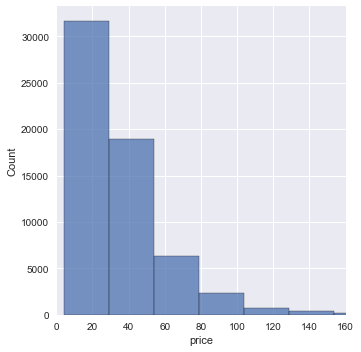

In [10]:
plt.style.use('seaborn')

sns.displot(eda.price, bins = 100);
plt.xlim(0,160)

In [11]:
#El 99% de los datos los tenemos con un precio inferior a $160

In [12]:
eda.points.quantile([0.25, 0.5, 0.75, 0.90, 0.95, 0.99, 0.999, 0.99999])

0.25000     86.0
0.50000     88.0
0.75000     91.0
0.90000     93.0
0.95000     94.0
0.99000     95.0
0.99900     98.0
0.99999    100.0
Name: points, dtype: float64

(70.0, 110.0)

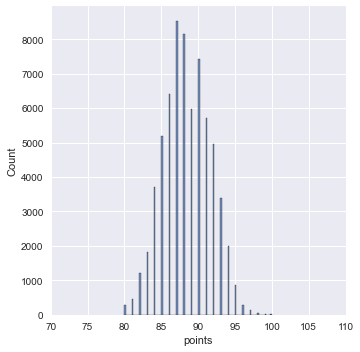

In [13]:
sns.displot(eda.points, bins = 100);
plt.xlim(70,110)

In [14]:
rango = eda.loc[eda['points']>=95]
rango.describe()

,points,price,Year,Latitude,Longitude,Lat_x,Long_x,temp_anual,temp_max_anual,temp_min_anual,pre_anual,etp_anual
count,1366.000000,1215.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000
mean,95.642020,142.750617,2008.883602,40.898862,-29.920843,40.922035,-29.953148,12.750930,17.877789,7.668155,828.712811,969.540264
std,1.038436,183.102818,2.503988,13.913309,63.251699,13.922893,63.245830,3.018627,3.257789,3.235190,332.480020,213.238571
min,95.000000,20.000000,2000.000000,-35.217262,-123.430534,-35.250000,-123.250000,1.770000,4.650000,-4.320000,102.200000,393.000000
25%,95.000000,60.000000,2007.000000,39.060002,-92.666267,39.250000,-92.750000,11.012500,15.910000,5.990000,619.500000,828.000000
50%,95.000000,85.000000,2009.000000,44.449500,-0.672885,44.250000,-0.750000,13.350000,17.950000,7.230000,791.800000,930.000000
75%,96.000000,141.000000,2011.000000,46.066728,7.942845,46.250000,7.750000,14.140000,19.195000,9.670000,932.700000,1134.000000
max,100.000000,2500.000000,2012.000000,59.941208,151.312067,59.750000,151.250000,27.490000,31.900000,23.240000,2560.700000,2076.000000


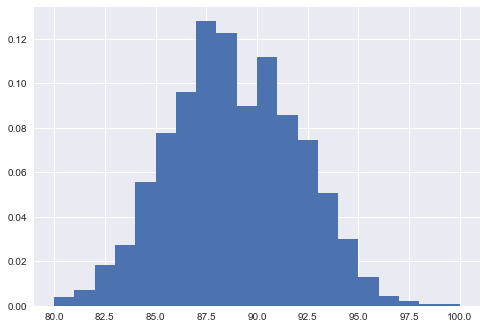

In [15]:
plt.figure()
plt.hist(eda['points'], bins = 20, density=True);


#sns.kdeplot(eda.points);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='points', ylabel='price'>

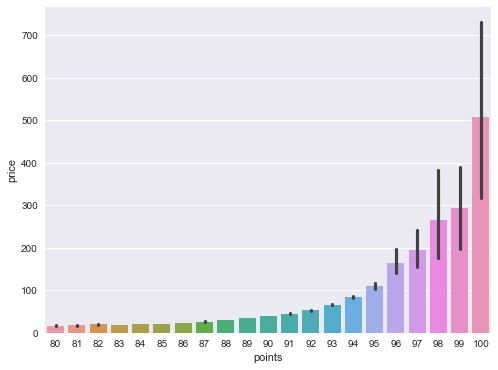

In [16]:
#barplot
plt.figure(figsize=(8, 6))
sns.barplot(eda.points,eda.price, data=eda)
#plt.xlabel("Points", size=14)
#plt.ylabel("LifeExp", size=14)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='points', ylabel='price'>

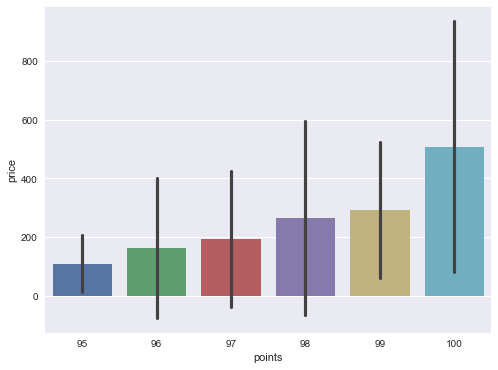

In [17]:
plt.figure(figsize=(8, 6))
sns.barplot(rango.points,rango.price, ci=  'sd', data=rango)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


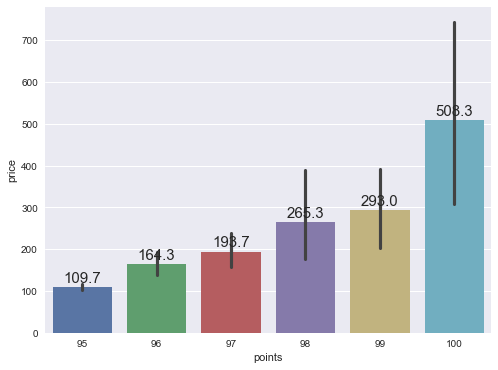

In [18]:
plt.figure(figsize=(8, 6))
splot = sns.barplot(rango.points,rango.price, data=rango)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, 9), 
                   textcoords = 'offset points')

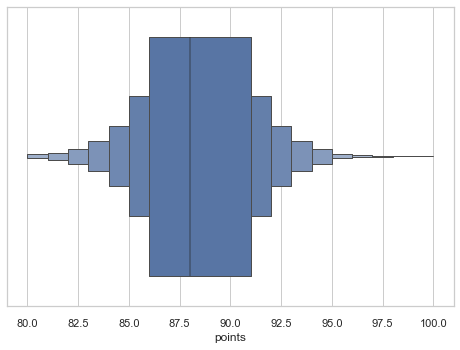

In [19]:
sns.set_theme(style="whitegrid")
#tips = sns.load_dataset("tips")
ax = sns.boxenplot(x=eda["points"])

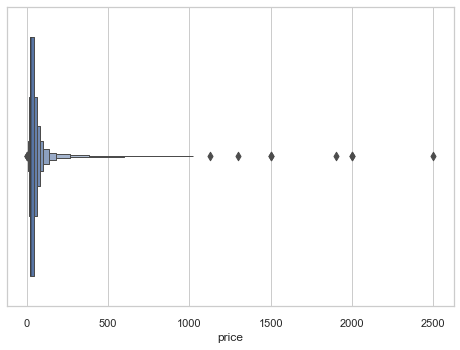

In [20]:
pricex = sns.boxenplot(x=eda["price"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

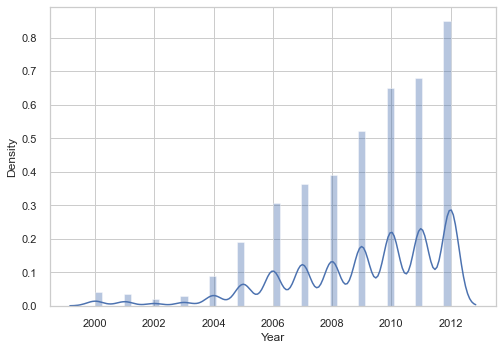

In [21]:
sns.distplot(eda.Year)

[Text(0, 0.5, 'country')]

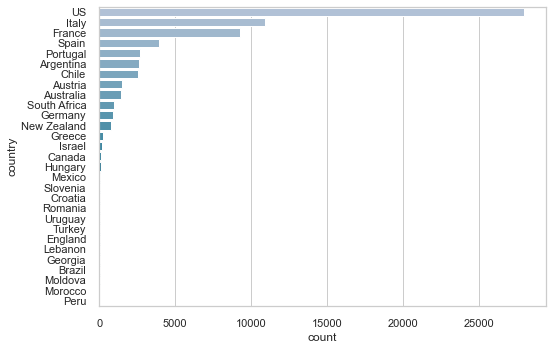

In [22]:
plot_data = eda.groupby('country').filter(lambda x : len(x)>10)
Appellation_Reg = sns.countplot(y="country",
                                data=plot_data, palette="PuBuGn_d", order = plot_data['country'].value_counts().index);
Appellation_Reg.set(ylabel='country')

[Text(0, 0.5, 'taster_name')]

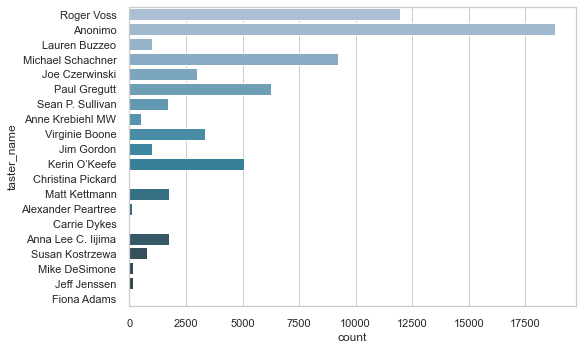

In [23]:
Appellation_Reg = sns.countplot(y="taster_name",  
data=eda, palette="PuBuGn_d");  
Appellation_Reg.set(ylabel='taster_name') 

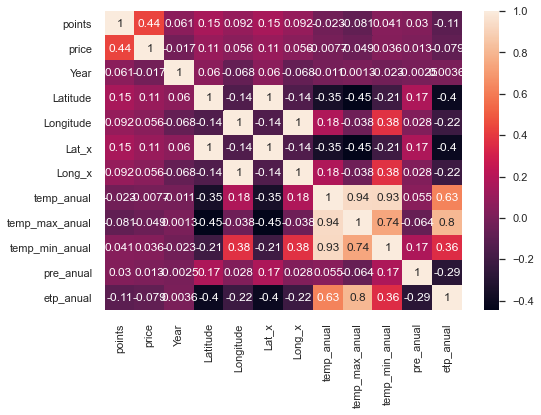

In [24]:
corrMatrix = eda.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [25]:
corrMatrix

,points,price,Year,Latitude,Longitude,Lat_x,Long_x,temp_anual,temp_max_anual,temp_min_anual,pre_anual,etp_anual
points,1.000000,0.435662,0.060871,0.153265,0.092464,0.153270,0.092226,-0.022734,-0.081399,0.041320,0.029625,-0.106149
price,0.435662,1.000000,-0.017254,0.105102,0.056444,0.105036,0.056300,-0.007672,-0.049365,0.036445,0.013116,-0.078710
Year,0.060871,-0.017254,1.000000,0.060066,-0.067995,0.060200,-0.068014,-0.011191,0.001300,-0.022702,-0.002479,0.003565
Latitude,0.153265,0.105102,0.060066,1.000000,-0.141112,0.999984,-0.141581,-0.351958,-0.445693,-0.206810,0.172412,-0.400679
Longitude,0.092464,0.056444,-0.067995,-0.141112,1.000000,-0.141276,0.999997,0.176286,-0.038490,0.375445,0.028184,-0.216805
Lat_x,0.153270,0.105036,0.060200,0.999984,-0.141276,1.000000,-0.141745,-0.352096,-0.445770,-0.206996,0.172825,-0.400901
Long_x,0.092226,0.056300,-0.068014,-0.141581,0.999997,-0.141745,1.000000,0.176412,-0.038256,0.375442,0.027963,-0.216629
temp_anual,-0.022734,-0.007672,-0.011191,-0.351958,0.176286,-0.352096,0.176412,1.000000,0.936135,0.930893,0.055349,0.627185
temp_max_anual,-0.081399,-0.049365,0.001300,-0.445693,-0.038490,-0.445770,-0.038256,0.936135,1.000000,0.742999,-0.064029,0.802513
temp_min_anual,0.041320,0.036445,-0.022702,-0.206810,0.375445,-0.206996,0.375442,0.930893,0.742999,1.000000,0.171547,0.359846


In [26]:
#pd.plotting.scatter_matrix(eda, alpha = 0.3, figsize = (15,15), diagonal = 'kde');

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Latitude', ylabel='Density'>

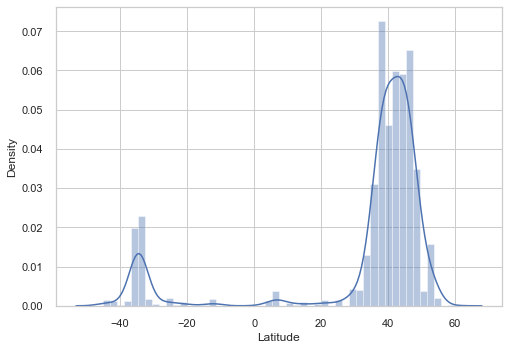

In [27]:
sns.distplot(eda.Latitude)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Longitude', ylabel='Density'>

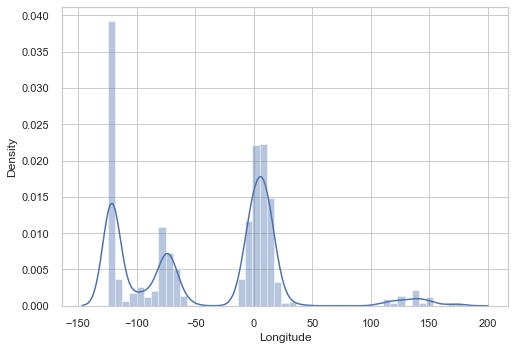

In [28]:
sns.distplot(eda.Longitude)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='temp_anual', ylabel='Density'>

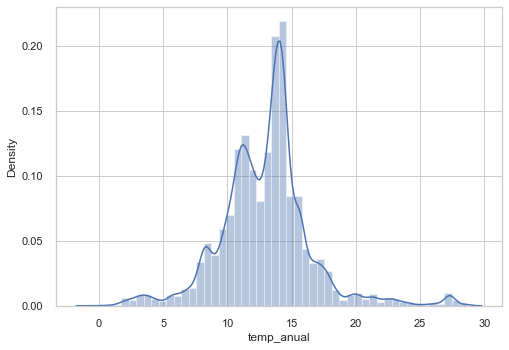

In [29]:
sns.distplot(eda.temp_anual)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='temp_max_anual', ylabel='Density'>

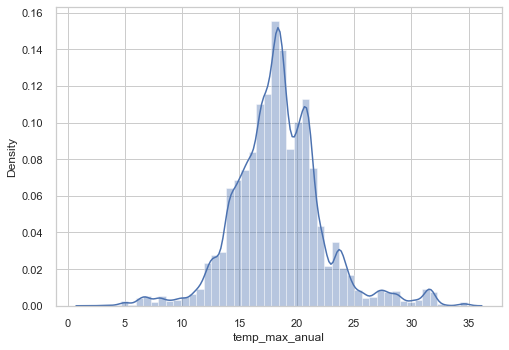

In [30]:
sns.distplot(eda.temp_max_anual)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='temp_min_anual', ylabel='Density'>

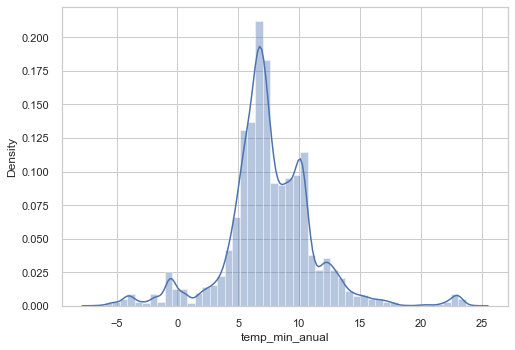

In [31]:
sns.distplot(eda.temp_min_anual)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='etp_anual', ylabel='Density'>

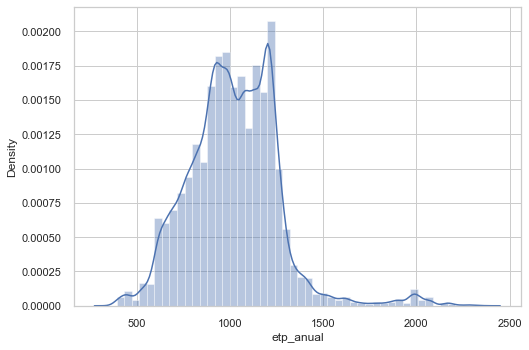

In [32]:
sns.distplot(eda.etp_anual)

In [33]:
plt.style.use('seaborn-whitegrid')

In [34]:
#relacionar poins/price contra latitud y longitud. Cada 2

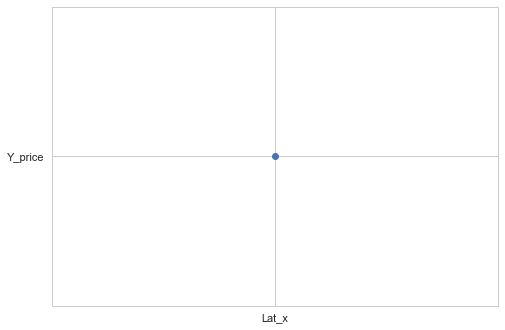

In [40]:
plt.figure()
plt.scatter('Lat_x', 'Y_price')

(array([3.000e+00, 1.506e+03, 7.765e+03, 9.251e+03, 7.376e+03, 6.463e+03,
        4.792e+03, 4.516e+03, 3.509e+03, 3.106e+03, 2.463e+03, 1.623e+03,
        1.503e+03, 1.192e+03, 8.430e+02, 1.026e+03, 5.990e+02, 4.940e+02,
        4.920e+02, 3.050e+02, 3.790e+02, 1.160e+02, 1.600e+02, 8.700e+01,
        1.800e+02, 1.910e+02, 1.070e+02, 7.300e+01, 7.900e+01, 6.300e+01,
        1.380e+02, 2.500e+01, 4.000e+01, 4.000e+01, 1.800e+01, 3.800e+01,
        2.300e+01, 9.000e+00, 1.500e+01, 6.300e+01]),
 array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
         55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100., 105.,
        110., 115., 120., 125., 130., 135., 140., 145., 150., 155., 160.,
        165., 170., 175., 180., 185., 190., 195., 200.]),
 <BarContainer object of 40 artists>)

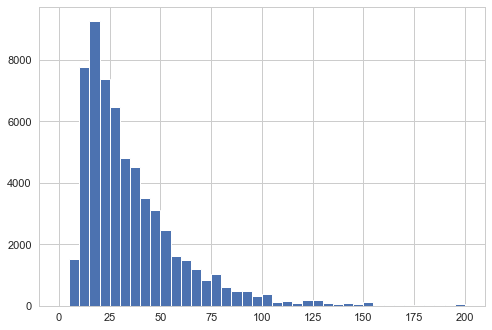

In [37]:
plt.hist(eda['price'], bins=40, range =(0,200) )#,  density=True)

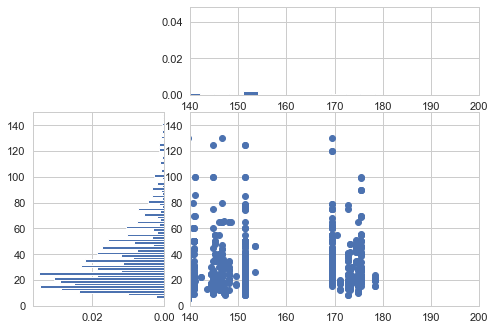

In [41]:
import matplotlib.gridspec as gridspec
plt.figure()
gridspec_ = gridspec.GridSpec(3, 3)

top_histogram = plt.subplot(gridspec_[0, 1:])
side_histogram = plt.subplot(gridspec_[1:, 0])
lower_right = plt.subplot(gridspec_[1:, 1:])

#PRICE VS LONGITUDE
Y_price = eda['price']
X_Longitude = eda['Longitude']

lower_right.scatter(X_Longitude, Y_price)
top_histogram.hist(X_Longitude, bins=100)
s = side_histogram.hist(Y_price, bins=100, orientation='horizontal')

# clear the histograms and plot normed histograms
top_histogram.clear()
top_histogram.hist(X_Longitude, bins=100, density=True)
side_histogram.clear()
side_histogram.hist(Y_price, bins=100, range =(0,200), orientation='horizontal', density=True)
# flip the side histogram's x axis
side_histogram.invert_xaxis()

# change axes limits
for ax in [top_histogram, lower_right]:
    ax.set_xlim(140, 200)
for ax in [side_histogram, lower_right]:
    ax.set_ylim(0, 150)

NameError: name 'Y_points' is not defined

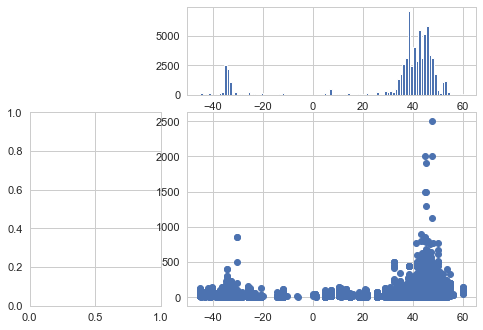

In [42]:
plt.figure()
gridspec_ = gridspec.GridSpec(3, 3)

top_histogram = plt.subplot(gridspec_[0, 1:])
side_histogram = plt.subplot(gridspec_[1:, 0])
lower_right = plt.subplot(gridspec_[1:, 1:])

#PRICE VS LATITUDE
Y_price = eda['price']
X_Latitude = eda['Latitude']

lower_right.scatter(X_Latitude, Y_price)
top_histogram.hist(X_Latitude, bins=100)
s = side_histogram.hist(Y_points, bins=100, orientation='horizontal')

# clear the histograms and plot normed histograms
top_histogram.clear()
top_histogram.hist(X_Latitude, bins=100, density=True)
side_histogram.clear()
side_histogram.hist(Y_price, bins=100, range =(0,200), orientation='horizontal', density=True)
# flip the side histogram's x axis
side_histogram.invert_xaxis()

# change axes limits
for ax in [top_histogram, lower_right]:
    ax.set_xlim(-100, 200)
for ax in [side_histogram, lower_right]:
    ax.set_ylim(0, 150)

In [ ]:
plt.figure()
gridspec_ = gridspec.GridSpec(3, 3)

top_histogram = plt.subplot(gridspec_[0, 1:])
side_histogram = plt.subplot(gridspec_[1:, 0])
lower_right = plt.subplot(gridspec_[1:, 1:])

#POINTS VS LONGITUDE
Y_points = eda['points']
X_Longitude = eda['Longitude']

lower_right.scatter(X_Longitude, Y_points)
top_histogram.hist(X_Longitude, bins=100)
s = side_histogram.hist(Y_points, bins=100, orientation='horizontal')

# clear the histograms and plot normed histograms
top_histogram.clear()
top_histogram.hist(X_Longitude, bins=100, density=True)
side_histogram.clear()
side_histogram.hist(Y_points, bins=100, range =(0,200), orientation='horizontal', density=True)
# flip the side histogram's x axis
side_histogram.invert_xaxis()

# change axes limits
for ax in [top_histogram, lower_right]:
    ax.set_xlim(-100, -50)
for ax in [side_histogram, lower_right]:
    ax.set_ylim(0, 150)

In [ ]:
plt.figure()
gridspec_ = gridspec.GridSpec(3, 3)

top_histogram = plt.subplot(gridspec_[0, 1:])
side_histogram = plt.subplot(gridspec_[1:, 0])
lower_right = plt.subplot(gridspec_[1:, 1:])

#POINTS VS LATITUDE
Y_points = eda['points']
X_Latitude = eda['Latitude']

lower_right.scatter(X_Latitude, Y_points)
top_histogram.hist(X_Latitude, bins=100)
s = side_histogram.hist(Y_points, bins=100, orientation='horizontal')

# clear the histograms and plot normed histograms
top_histogram.clear()
top_histogram.hist(X_Latitude, bins=100, density=True)
side_histogram.clear()
side_histogram.hist(Y_points, bins=100, range =(0,200), orientation='horizontal', density=True)
# flip the side histogram's x axis
side_histogram.invert_xaxis()

# change axes limits
for ax in [top_histogram, lower_right]:
    ax.set_xlim(-20, 20)
for ax in [side_histogram, lower_right]:
    ax.set_ylim(80, 100)

(array([1.580e+02, 3.400e+01, 5.300e+01, 1.120e+02, 1.600e+01, 1.600e+01,
        6.200e+01, 1.180e+02, 2.300e+02, 2.555e+03, 2.135e+03, 1.076e+03,
        3.500e+01, 2.000e+02, 8.000e+00, 4.300e+01, 3.000e+00, 2.000e+00,
        2.330e+02, 5.600e+01, 2.400e+01, 5.000e+00, 0.000e+00, 1.520e+02,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.100e+01,
        3.900e+01, 1.900e+02, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 8.000e+00, 6.000e+00, 0.000e+00, 0.000e+00, 1.630e+02,
        0.000e+00, 5.130e+02, 0.000e+00, 0.000e+00, 8.200e+01, 1.300e+01,
        0.000e+00, 3.300e+01, 1.120e+02, 7.000e+00, 2.000e+00, 0.000e+00,
        6.300e+01, 2.000e+00, 9.700e+01, 1.240e+02, 0.000e+00, 0.000e+00,
        0.000e+00, 2.020e+02, 0.000e+00, 8.000e+00, 3.530e+02, 2.460e+02,
        2.790e+02, 2.690e+02, 5.110e+02, 1.293e+03, 1.774e+03, 2.581e+03,
        3.085e+03, 7.074e+03, 2.392e+0

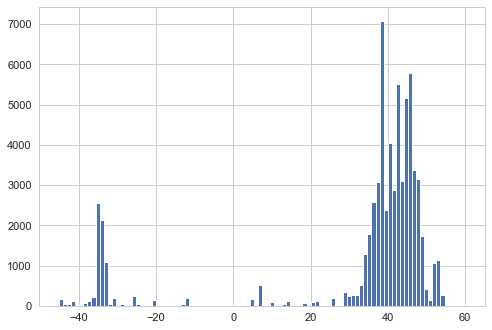

In [43]:
plt.hist(eda['Latitude'], bins=100)

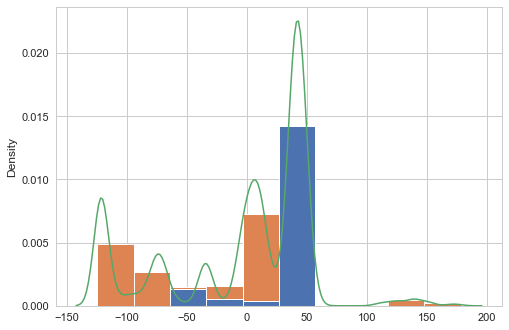

In [44]:
plt.figure()
plt.hist([eda.Latitude, eda.Longitude], histtype='barstacked', density=True);
v3 = np.concatenate(([eda.Latitude, eda.Longitude]))
sns.kdeplot(v3);

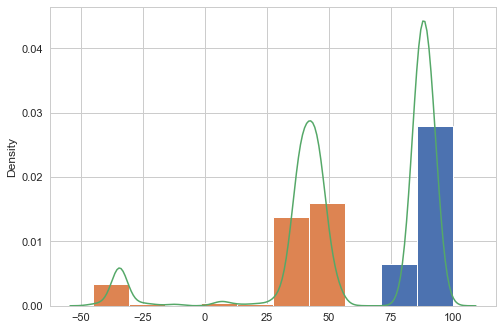

In [45]:
plt.figure()
plt.hist([eda.points, eda.Latitude], histtype='barstacked', density=True);
v3 = np.concatenate(([eda.points, eda.Latitude]))
sns.kdeplot(v3);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


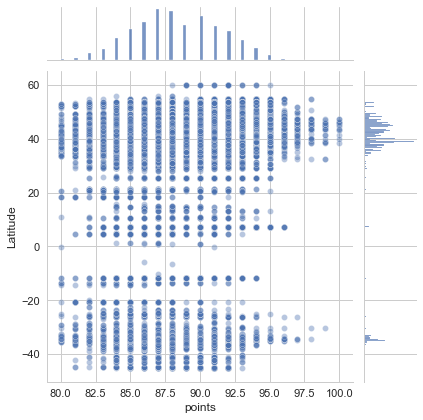

In [46]:
sns.jointplot(eda.points,eda.Latitude, alpha=0.4);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


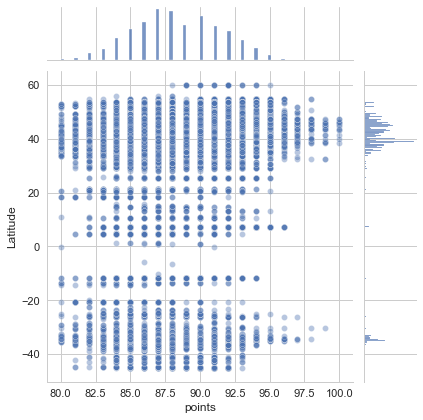

In [47]:
sns.jointplot(eda.points,eda.Latitude, alpha=0.4);

# Histrogramas

### Latitudes Vs. Puntajes

Se utilizará, basandose en la ley de pareto, las calificaciones del 20% de los mejores vinos. Para esto, como los vinos son calificados de 80 a 100, el 20% es el puntaje de 96 a 100. Con esta información, separamos las diferentes zonas de Latitudes con respecto a los trópicos, los cuales determinan las zonas de calor.

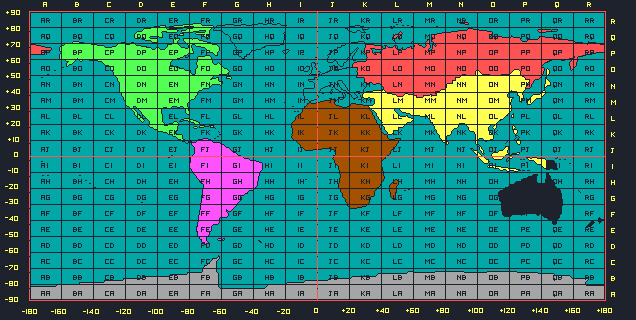

Con esto, realizamos el cruce gráfico de estas zonas, buscando ciertas conclusiones sobre las zonas geográficas contra la calidad de los vinos. No se graficarán datos sobre los círculos árticos y antárticos ya que no se encuentra información en nuestra base de datos de algún vino en estas zonas 

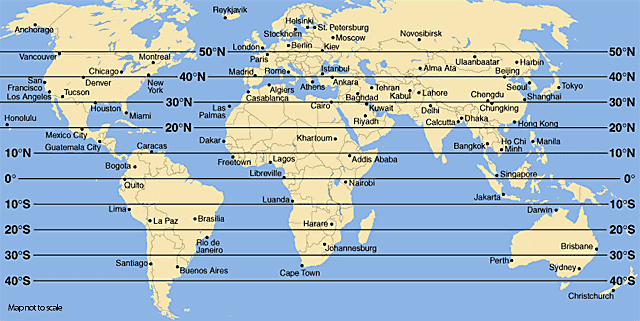

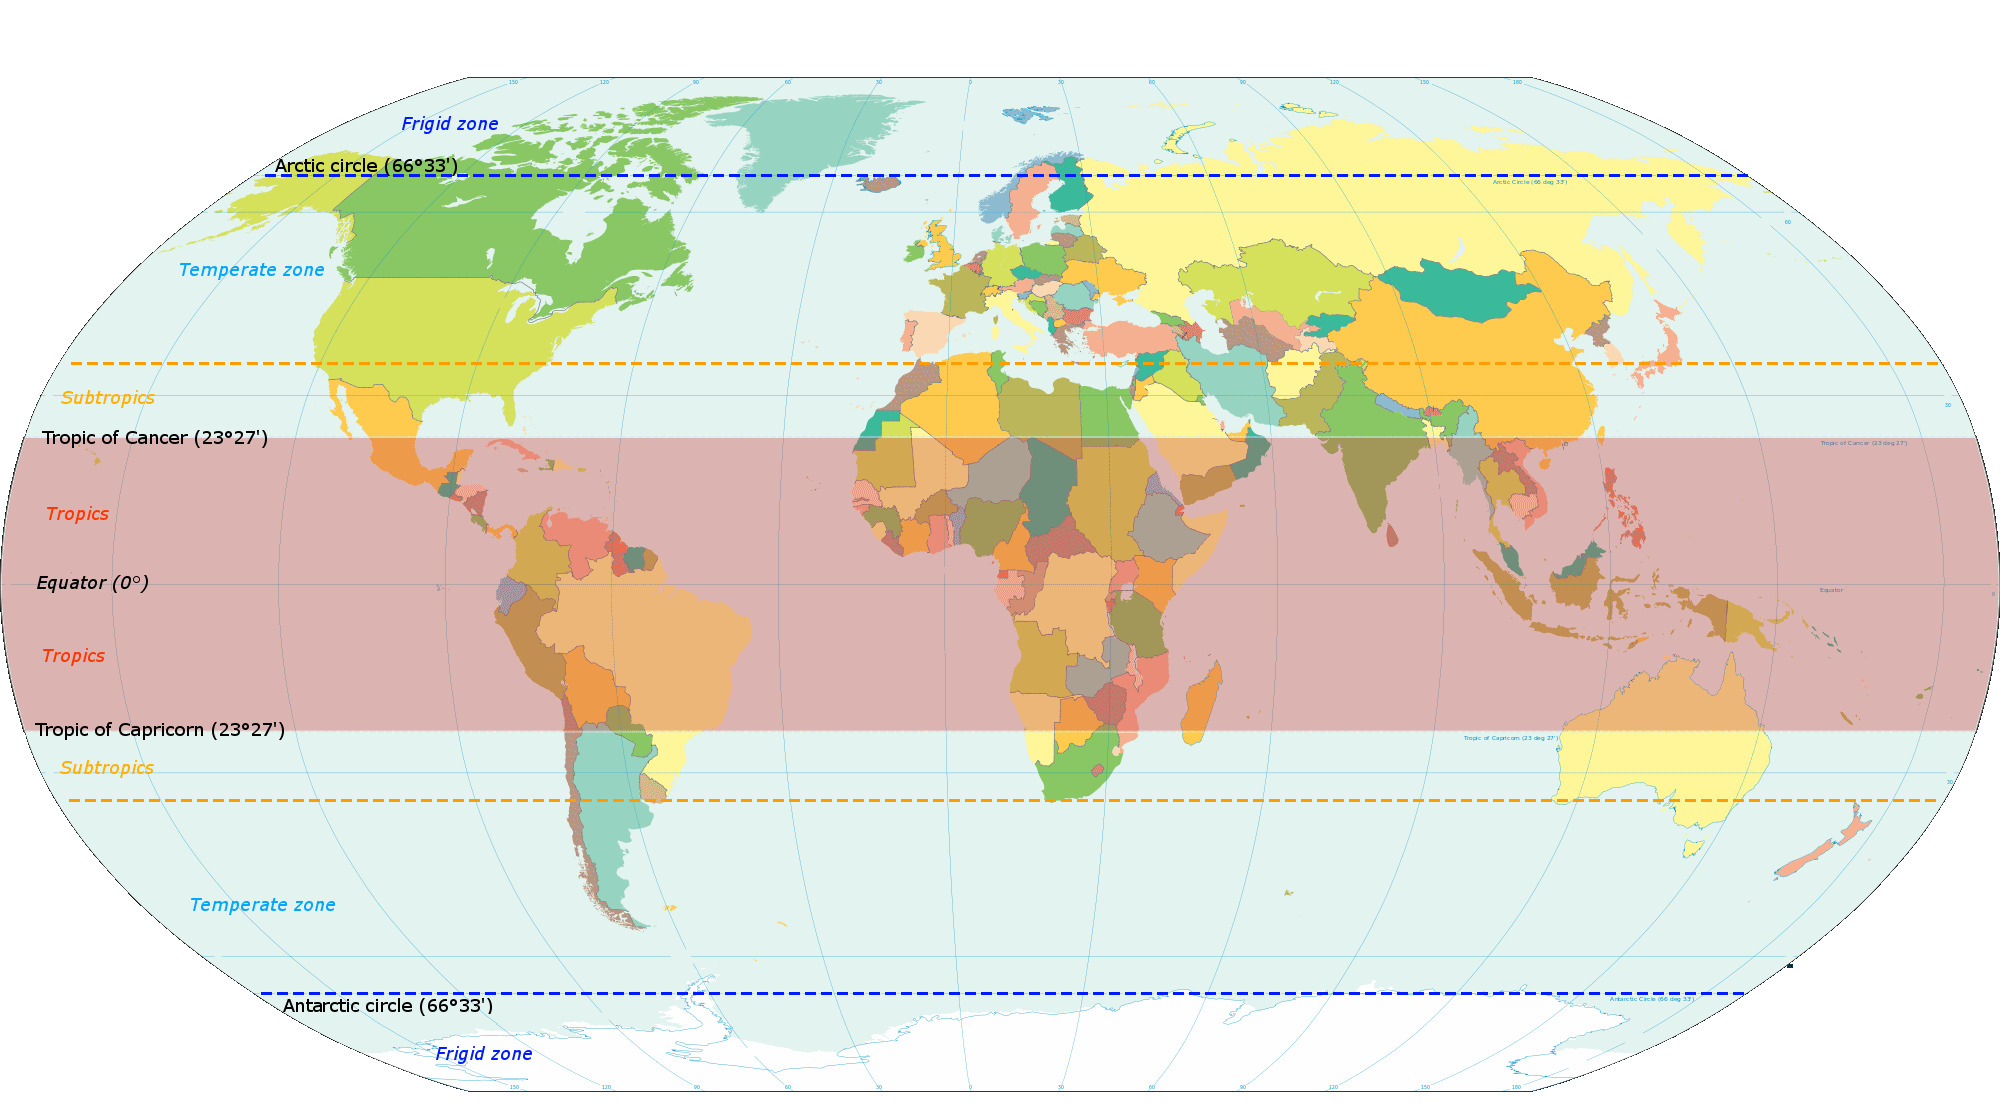

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


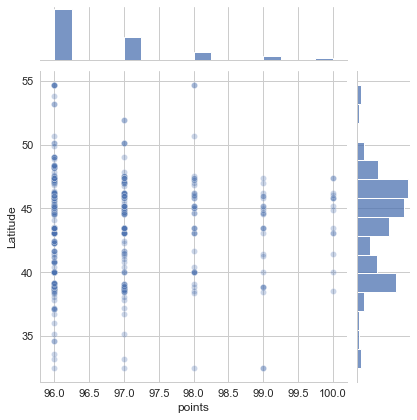

In [48]:
#Trópico de Cancer
df = eda[(eda.points>95) & (eda.Latitude>23.5)]
sns.jointplot(df.points,df.Latitude, alpha=0.3);

**Conclusion** Se encuentra una mayor concentración de vinos de buena calidad en las latitudes cercanas a los 39°, 45°, 46° y 47°; esta característica tambien se puede percibir ligeramente con los vinos de puntaje 99 y 100.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,country,description,points,price,taster_name,variety,winery,Year,region,Latitude,Longitude,Lat_x,Long_x,temp_anual,temp_max_anual,temp_min_anual,pre_anual,etp_anual
44220,US,This is the most expensive Pinot Noir Foxen ha...,96,85.0,Anonimo,Pinot Noir,Foxen,2010,Sta. Rita Hills,7.117597,125.642556,7.25,125.75,27.14,31.60,22.72,2500.4,1203
44457,US,From the southernmost part of the appellation ...,96,50.0,Anonimo,Pinot Noir,Babcock,2009,Sta. Rita Hills,7.117597,125.642556,7.25,125.75,27.31,31.68,23.00,2128.6,1185
44548,US,Huge rich white Burgundy style Chardonnay. Has...,96,38.0,Anonimo,Chardonnay,Ojai,2007,Sta. Rita Hills,7.117597,125.642556,7.25,125.75,27.37,31.76,23.03,2194.2,1197
44638,US,An exotic Pinot Noir feral and exciting in its...,96,44.0,Anonimo,Pinot Noir,Samsara,2008,Sta. Rita Hills,7.117597,125.642556,7.25,125.75,27.15,31.45,22.90,2560.7,1182
44680,US,This wine is as fine as anything from Santa Ri...,96,56.0,Anonimo,Pinot Noir,Ojai,2005,Sta. Rita Hills,7.117597,125.642556,7.25,125.75,27.34,31.90,22.80,2242.2,1206


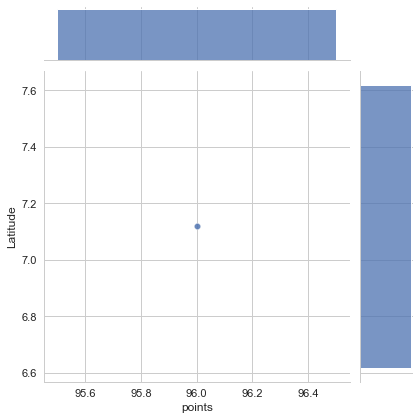

In [49]:
#Ecuador Norte
df = eda[(eda.points>95) & (eda.Latitude<23.5) & (eda.Latitude>0)]
sns.jointplot(df.points,df.Latitude, alpha=0.3);
df

**Conclusion** Solo se encuentran cinco vinos en esta zona con un puntaje de 96. Esto muestra que la zona del Ecuador Norte no posee muy buenas zonas para sembrar vinos, pero resulta curioso que de estos 6 vinos, 5 corresponden a la cepa Pinot Noir.

In [ ]:
#Ecuador Sur
df = eda[(eda.points>95) & (eda.Latitude>-23.5) & (eda.Latitude<0)]
sns.jointplot(df.points,df.Latitude, alpha=0.3);
df

**Conclusion** No se encuentra ningún vino en esta zona.

In [ ]:
#Trópico de Capricornio
df = eda[(eda.points>95) & (eda.Latitude<-23.5) & (eda.Latitude>-66.5)]
sns.jointplot(df.points,df.Latitude, alpha=0.3);

**Conclusion** En este gráfico se encuentra un número bajo de calificaciones, debido a que la cantridad de muestras es mucho mayor en la zona norta que en la zona sur. En este caso, se ve que los mejores vinos se encuentran alrededor de los -29°/-31° y hacia el sur.

**Sería también correcto analizar las zonas con peores vinos? Creería que no ya que no es el objetivo de nuestro análisis**

### Longitudes Vs. Puntaje

Se realiza el análisis análogo al de Latitudes, esta vez no se tienen zonas para los meridianos, por lo que se separarán en las siguientes zonas:
1. Este USA (EU): -160° a -100°
2. Oeste USA y LATAM (OUL): -100° a -20°
3. Este Europa y Africa (EEA): -20° a 30°
4. Oeste Europa y Emiratos Árabes (OEEA): 30° a 70°
5. Asia y Oceanía (AO): 70° a 180°

In [ ]:
#Zona EU
df = eda[(eda.points>95) & (eda.Longitude>-160) & (eda.Longitude<=-100)]
sns.jointplot(df.Longitude,df.points, alpha=0.3);

**Conclusion** Los mejores vinos se dan en las Longitudes alrededor de los -122° y -117°, que comprende la región de California.

In [ ]:
#Zona OUL
df = eda[(eda.points>95) & (eda.Longitude>-100) & (eda.Longitude<=-20)]
sns.jointplot(df.Longitude,df.points, alpha=0.3);

**Conclusion** Los mejores vinos se dan en múltiples longitudes, con concentración entre los -80° y -74°

In [ ]:
#Zona EEA
df = eda[(eda.points>95) & (eda.Longitude>-20) & (eda.Longitude<=30)]
sns.jointplot(df.Longitude,df.points, alpha=0.3);

**Conclusion** Los mejores vinos se encuentran distribuidos, con una mayor concentración entre los -7° y 12°, la cual es la zona comprendida para España, Francia e Italia.

In [ ]:
#Zona OEEA
df = eda[(eda.points>95) & (eda.Longitude>30) & (eda.Longitude<=70)]
sns.jointplot(df.Longitude,df.points, alpha=0.3);
df

**Conclusion** Se encontró un dato atípico de la distribución, ya que este vino pertenece a Estados Unidos.

In [ ]:
#Zona AO
df = eda[(eda.points>95) & (eda.Longitude>70) & (eda.Longitude<180)]
sns.jointplot(df.Longitude,df.points, alpha=0.3);
df

También se encontraron datos atípicos

In [51]:
from geopy import Nominatim
from geopy.extra.rate_limiter import RateLimiter

geolocator = Nominatim(user_agent="geoapiExercises")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1.5)

In [67]:
ladd1 = "Le Grande rue, france"
print("Location address:",ladd1)
location = geolocator.geocode(ladd1)
print("Latitude and Longitude of the said address:")
print((location.latitude, location.longitude))

Location address: Le Grande rue, france


GeocoderUnavailable: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Le+Grande+rue%2C+france&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))

Test